_____
# **PERCEPTRON**
________

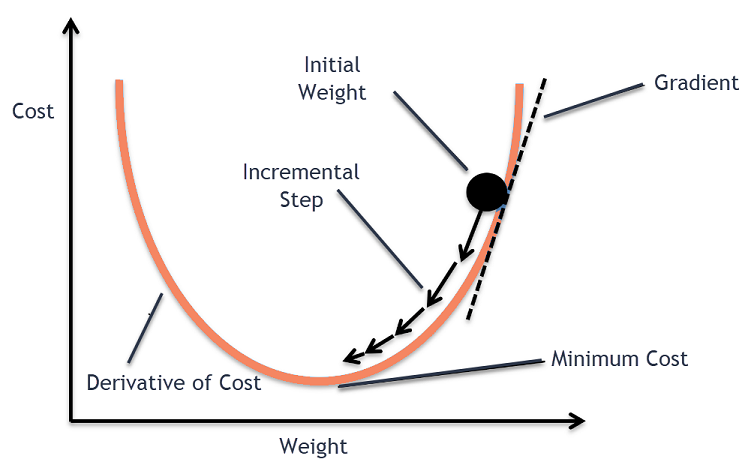

A Perceptron is a foundational supervised learning algorithm, and it forms the basis for many modern neural networks. Let's break down your request into two tasks: one for a single-layer Perceptron (often referred to as the "Perceptron") and the other for a multilayer Perceptron (MLP).

### **Types of Perceptron**

#### 1. **Single-Layer Perceptron**

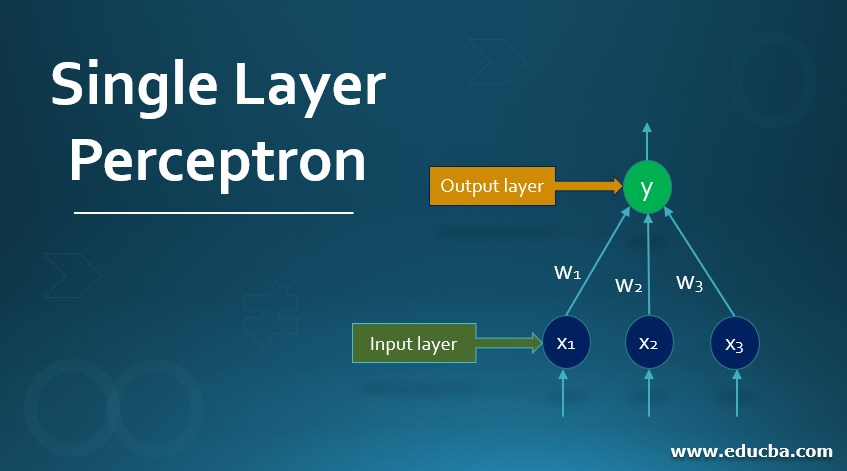

This type of perceptron is the most basic, with just one layer of neurons.  Tasks involving binary classification make use of it.  Depending on a thresholding decision function, the model produces one of two classes.
The output 
𝑦
y of a single-layer perceptron is computed as:

  $$
  y = \text{sign}\left( \sum_{i=1}^{n} w_i x_i + b \right)
  $$

  Where:
  - \( x_i \) are the input features.
  - \( w_i \) are the weights associated with the inputs.
  - \( b \) is the bias term.
  - \( \text{sign}(z) \) is the activation function, typically using the step function where:
    $$
    \text{sign}(z) = 
    \begin{cases}
    1, & \text{if } z \geq 0 \\
    -1, & \text{if } z < 0
    \end{cases}
    $$  


#### 2. **Multi-layer Perceptron**

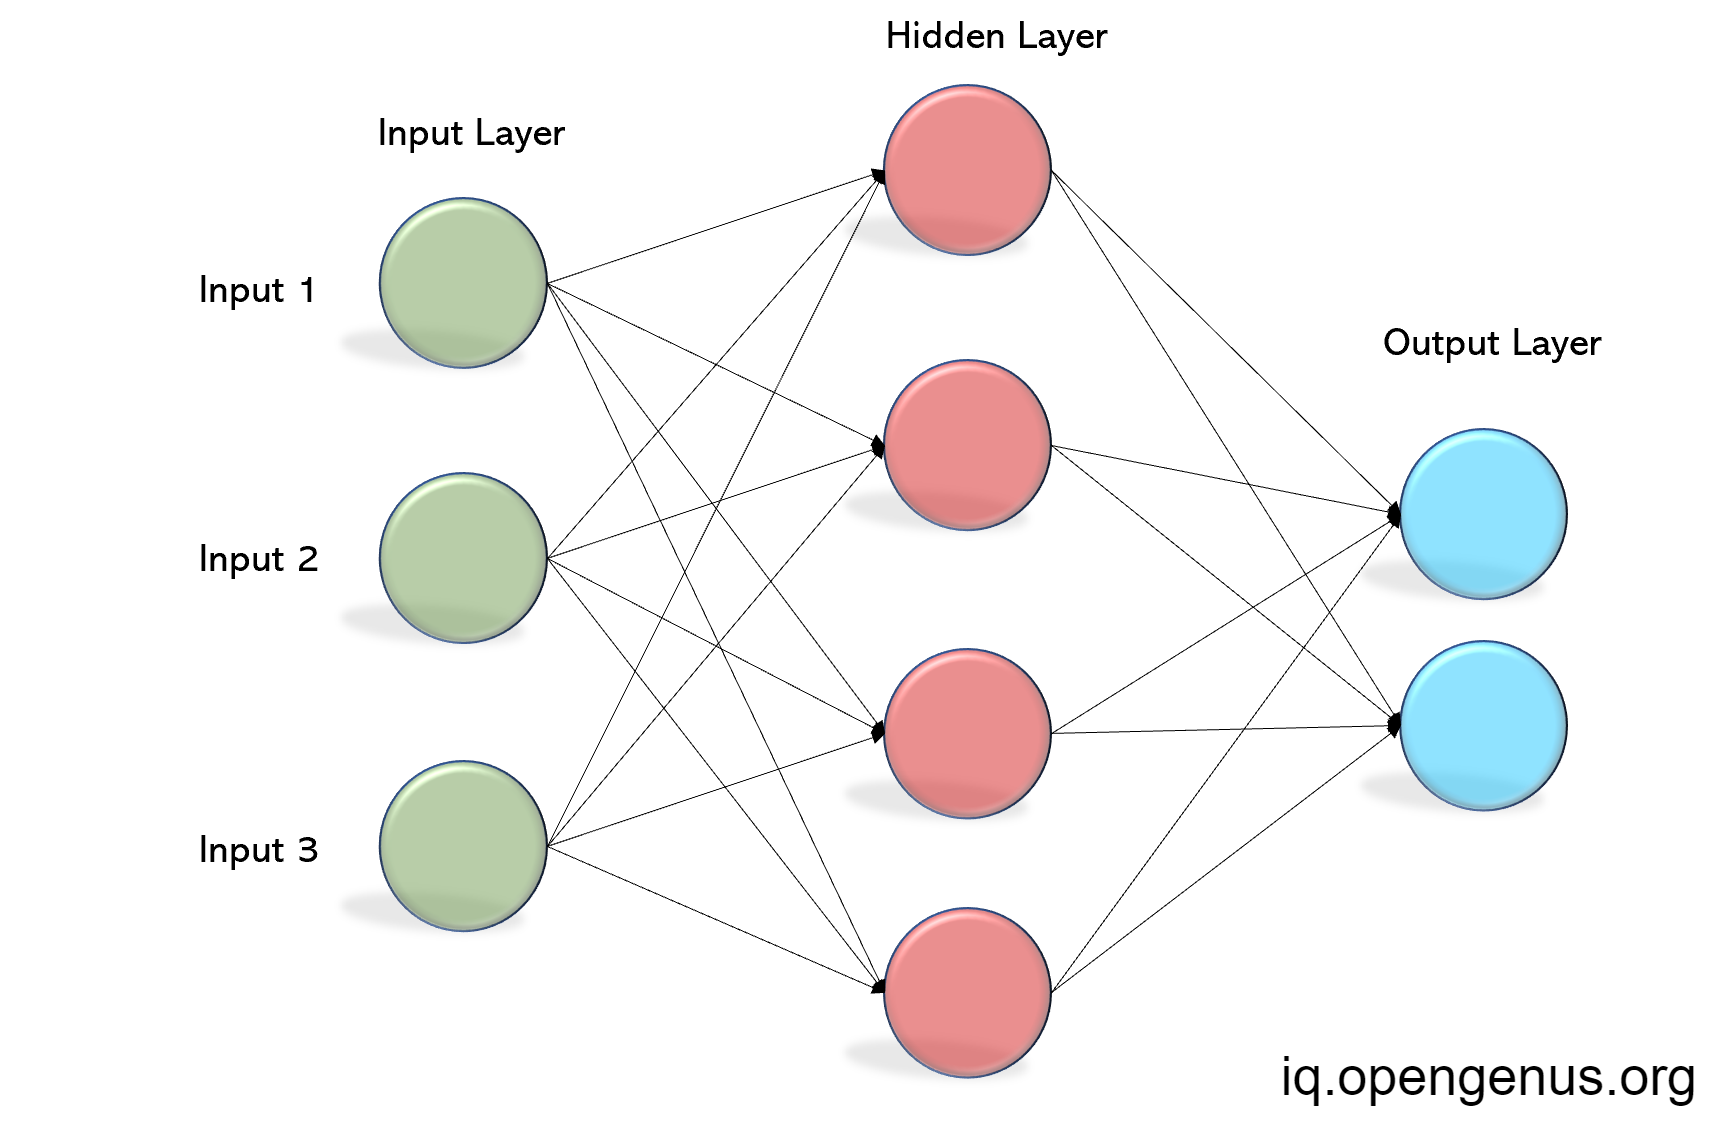

The network of this more complex type of perceptron is made up of several levels, including one or more hidden layers.  More difficult regression and classification tasks can be handled by MLPs.  The network may discover nonlinear relationships in the data thanks to the hidden layers.

The output \( y \) of a multi-layer perceptron is computed in layers:
  - The input is processed by each layer (input layer → hidden layer → output layer).
  - The output of each layer \( z \) is computed as:
    $$
    z = W \cdot x + b
    $$
  - The activation function (e.g., ReLU, Sigmoid) is applied after the linear transformation:
    $$
    \text{activation}(z)
    $$
  - Finally, the output layer computes the final result using:
    $$
    y = f(\text{activation}(z))
    $$
    where \( f \) could be softmax for classification or identity for regression.


## **Task For this Notebook**

The task for this notebook shall be in two parts :

1. **Single-layer Perceptron :**
 The task is to train a single-layer neural network (perceptron) to classify grayscale images of clothing into one of 10 categories


2. **Multi-layer perceptron :**
This task involves classifying images from the Fashion MNIST dataset. This dataset contains 10 categories of fashion items, and we'll use a simple multi-layer perceptron with more than one hidden layer.

## **1. Single Layer Perceptron**


### Required Libraries

The libraries required to achieve the task are:

- **tensorflow** → Provides essential tools and functionalities to build and train deep learning models, including neural networks. We use `tensorflow.keras` for model creation and training.
- **tensorflow.keras.models** → Used to create and configure the neural network models. Specifically, `Sequential` is used for defining the model's architecture.
- **tensorflow.keras.layers** → Contains different layers that can be added to the model, such as `Dense` for fully connected layers.
- **tensorflow.keras.datasets** → Provides access to built-in datasets like **Fashion MNIST**, which is used for image classification in this notebook.
- **numpy** → Efficient numerical operations for creating, manipulating, and transforming data, and handling vectorized operations.
- **matplotlib.pyplot** → Used for creating plots and visualizations (e.g., visualizing predictions, loss over epochs, etc.).
- **tensorflow.keras.preprocessing.image** → Contains utilities like `ImageDataGenerator` for augmenting image data, though not used in this specific example, it is often useful for real-time data augmentation in image tasks.



### Install tensorflow

### Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Clear warnings for clean code
import warnings
warnings.filterwarnings('ignore')


### Load the Data



In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Data Preprocessing

In [4]:
# Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images to 1D arrays of size 784 (28 * 28)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

### Single-Layer Perceptron Model


In [5]:
# Build a single-layer perceptron (SLP) model
model = Sequential([
    Dense(10, input_dim=784, activation='softmax')  # 10 output units (one for each class), softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(x_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7346 - loss: 0.7753 - val_accuracy: 0.8253 - val_loss: 0.5097
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.8419 - loss: 0.4664 - val_accuracy: 0.8350 - val_loss: 0.4720
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.8476 - loss: 0.4443 - val_accuracy: 0.8417 - val_loss: 0.4594
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8549 - loss: 0.4212 - val_accuracy: 0.8415 - val_loss: 0.4563
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.8571 - loss: 0.4097 - val_accuracy: 0.8453 - val_loss: 0.4484
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8499 - loss: 0.4408
Test accuracy: 0.845300018787384
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step


### Visualization of Model Predictions

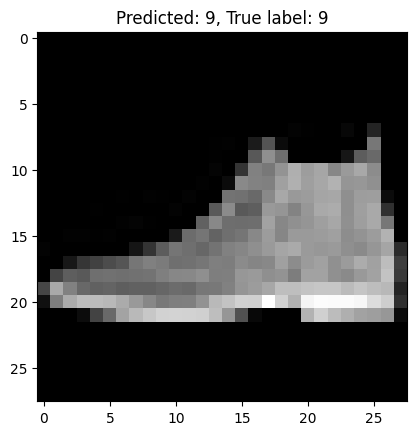

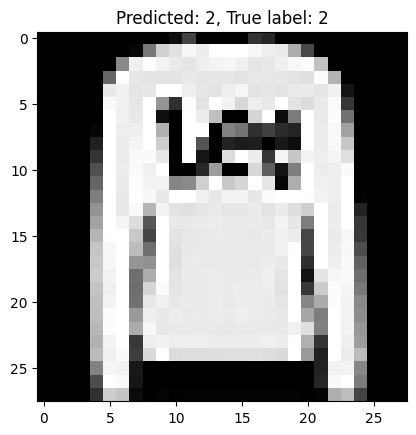

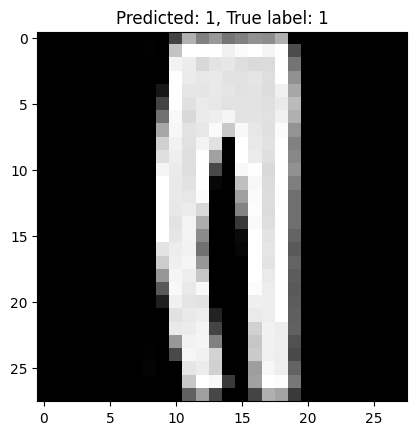

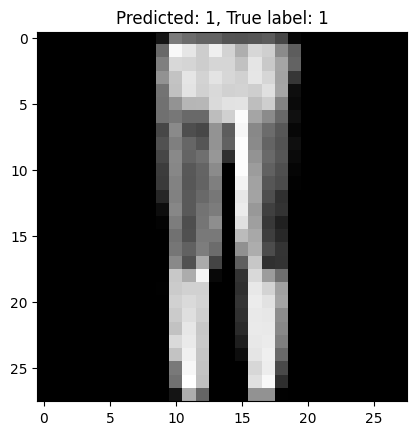

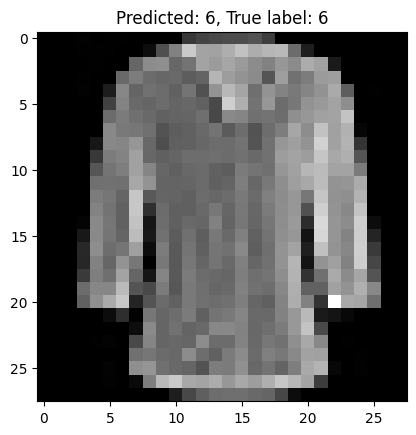

In [6]:
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape back to 28x28 for visualization
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True label: {y_test[i]}")
    plt.show()

**Observations from the graphs**

The images depicts a pair of pants, shoe, jumper, and shirt from the dataset.

This shows the perceptron successfully identified the clothing item, suggesting that it has learned the patterns in the dataset well.

## **2. Multi-Layer Perceptron**




### Required Libraries

The libraries required to achieve the task are:

- **tensorflow** → Provides essential tools and functionalities to build and train deep learning models, including neural networks. We use `tensorflow.keras` for model creation and training.
- **tensorflow.keras.layers** → Contains different layers that can be added to the model, such as `Dense` and other common layer types used for building neural networks.
- **tensorflow.keras.models** → Used to create and configure the neural network models. The `Sequential` model is used to define the architecture.
- **tensorflow.keras.datasets** → Provides access to built-in datasets like **Fashion MNIST**, which is used for image classification in this notebook.
- **tensorflow.keras.utils** → Contains utilities such as `to_categorical` for one-hot encoding of labels, which is important for multi-class classification tasks.
- **matplotlib.pyplot** → Used for creating plots and visualizations (e.g., visualizing predictions, loss over epochs, etc.).
- **numpy** → Efficient numerical operations for creating, manipulating, and transforming data, and handling vectorized operations.



### Import Libraries

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

### Load the Dataset

In [8]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Data Augmentation and Preprocessing.

The pixel values needs to be normalized while the images needs to be flattened and one-hot encoding labelling must be applied.


In [9]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images from 28x28 to 784
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# One-hot encode the labels (10 categories)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Multi-Layer Perceptron

In [10]:
# Build the Multi-Layer Perceptron Model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_dim=28*28),  
    layers.Dense(64, activation='relu'),                    
    layers.Dense(10, activation='softmax')                  
])

# Compile the model
model.compile(optimizer='adam',  
              loss='categorical_crossentropy',  
              metrics=['accuracy'])  

# Train the model
history = model.fit(x_train, y_train,  
                    epochs=5,  
                    batch_size=32,  
                    validation_data=(x_test, y_test))  

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7785 - loss: 0.6272 - val_accuracy: 0.8433 - val_loss: 0.4267
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8635 - loss: 0.3756 - val_accuracy: 0.8583 - val_loss: 0.3938
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8779 - loss: 0.3325 - val_accuracy: 0.8593 - val_loss: 0.3983
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8869 - loss: 0.3090 - val_accuracy: 0.8779 - val_loss: 0.3425
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8936 - loss: 0.2859 - val_accuracy: 0.8775 - val_loss: 0.3471
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.8788 - loss: 0.3445
Test accuracy: 0.8774999976158142


The proportion of test images that the model properly predicted is reflected in the test accuracy.  In this instance, it indicates that roughly **83.6%** of the 10,000 test photos were properly identified by the model.

### Model Prediction Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


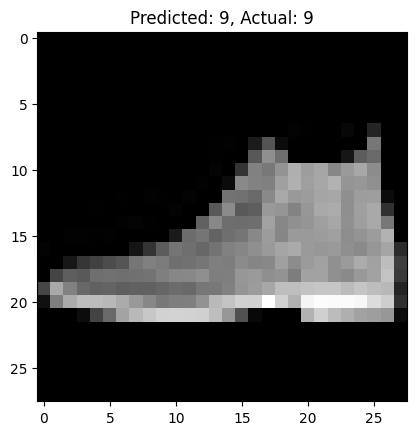

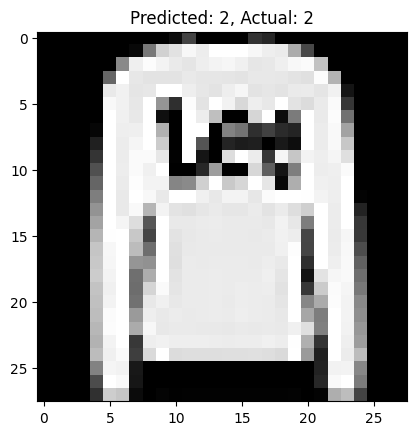

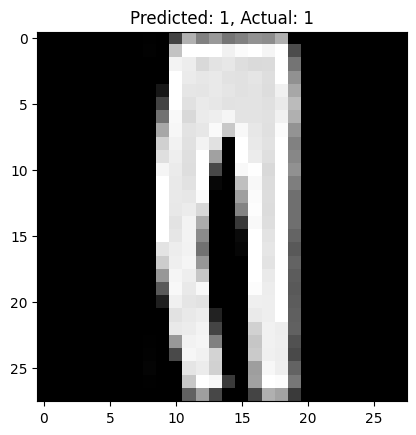

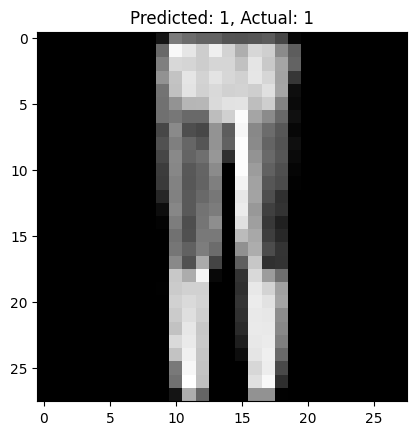

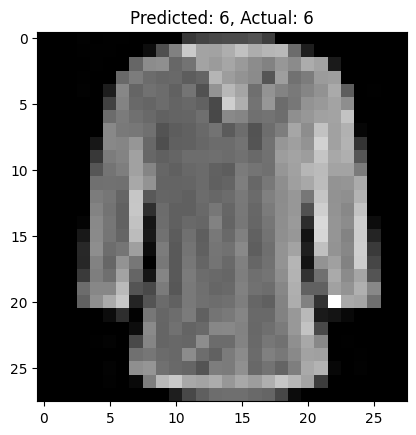

In [11]:
predictions = model.predict(x_test[:5])  # Get predictions for the first 5 test images
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 for visualization
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.show()

**Observations from the graphs**

The images shows a grayscale representation of a pair of pants, with the text indicating that the model predicted the label which matches the true label.

This correct prediction suggests that the Multi-layer perceptron model successfully identifies clothing items in the dataset

## **Conclusion of Notebook**

In this notebook, we used the Fashion MNIST dataset to investigate the application of Single-Layer Perceptron (SLP) and Multi-Layer Perceptron (MLP) models for picture classification tasks.



**Single-Layer Perceptron (SLP)**:

 - The SLP model was trained to categorize apparel photos into ten groups. The model was able to effectively identify a variety of apparel items from the dataset, including shirts, jumpers, shoes, and pants, as shown by the prediction visualizations.

 - These findings imply that, with a strong accuracy on the test set, the single-layer perceptron successfully recognized the fundamental patterns in the photos to generate accurate predictions.


**Multi-Layer Perceptron (MLP)**:

  - Strong performance was also shown by the multi-layer MLP model. The model accurately predicted the labels of test images (such a pair of pants), matching the actual labels, according to the predictions' visualizations.

  - The test set's accuracy of 83.6% showed that the MLP had learned to differentiate between the various apparel categories and could effectively generalize to new photos.

According to these findings, the multi-layer perceptron is a more potent model than the single-layer perceptron, with the extra layers helping to capture more intricate patterns and increase accuracy.